In [1]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json,codecs
import warnings
warnings.filterwarnings("ignore")

Veri seti keras kütüphanesinde tanımlı oradan indiriyoruz.

In [2]:
(x_train, _ ),(x_test, _) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

Veri setinin tipini değiştiriyoruz

In [7]:
x_train = x_train.astype("float32")/255

In [8]:
x_test = x_test.astype("float32")/255

Veri setini yeniden boyutlandırıyoruz.

In [9]:
x_train = x_train.reshape((len(x_train),x_train.shape[1:][0]*x_train.shape[1:][1]))

In [11]:
x_test = x_test.reshape((len(x_test),x_test.shape[1:][0]*x_test.shape[1:][1]))

Veri setimizden bir örnek inceleyelim.

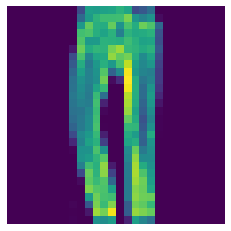

In [14]:
plt.imshow(x_train[1500].reshape(28,28))
plt.axis("off")
plt.show()

Model Oluştruma

In [15]:
input_img = Input(shape = (784,))

İki katmanı birleştirmek için önceki katmanı parantez içerisinde çalıştırıyoruz

In [16]:
encoded = Dense(32,activation='relu')(input_img)

In [17]:
encoded  = Dense(16, activation='relu')(encoded)

In [18]:
decoded = Dense(32,activation='relu')(encoded)

In [19]:
decoded = Dense(784,activation='sigmoid')(decoded)

In [20]:
autoencoder = Model(input_img,decoded)

In [21]:
autoencoder.compile(optimizer='rmsprop',loss='binary_crossentropy')

In [22]:
hist = autoencoder.fit( x_train,x_train,epochs=200,batch_size=256,shuffle=True,validation_data= (x_train,x_train))

Epoch 1/200
235/235 [==============================] - 5s 6ms/step - loss: 0.4703 - val_loss: 0.3518
Epoch 2/200
235/235 [==============================] - 1s 5ms/step - loss: 0.3434 - val_loss: 0.3271
Epoch 3/200
235/235 [==============================] - 1s 6ms/step - loss: 0.3253 - val_loss: 0.3205
Epoch 4/200
235/235 [==============================] - 1s 5ms/step - loss: 0.3192 - val_loss: 0.3163
Epoch 5/200
235/235 [==============================] - 1s 5ms/step - loss: 0.3154 - val_loss: 0.3129
Epoch 6/200
235/235 [==============================] - 1s 5ms/step - loss: 0.3126 - val_loss: 0.3104
Epoch 7/200
235/235 [==============================] - 1s 5ms/step - loss: 0.3099 - val_loss: 0.3080
Epoch 8/200
235/235 [==============================] - 1s 5ms/step - loss: 0.3087 - val_loss: 0.3068
Epoch 9/200
235/235 [==============================] - 1s 5ms/step - loss: 0.3069 - val_loss: 0.3060
Epoch 10/200
235/235 [==============================] - 1s 5ms/step - loss: 0.3061 - val_lo

Modelimizi kaydediyoruz

In [23]:
autoencoder.save_weights('autoencoders.h5')

Modelin Değerlendirilmesi

In [25]:
print(hist.history.keys())

dict_keys(['loss', 'val_loss'])


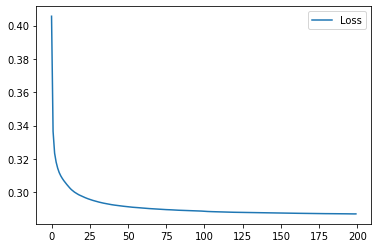

In [30]:
plt.plot(hist.history['loss'],label = 'Loss')
plt.legend()
plt.show()

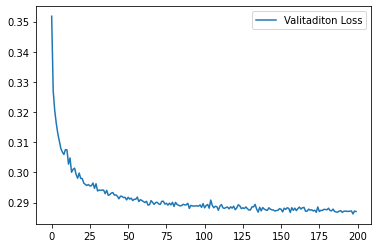

In [31]:
plt.plot(hist.history['val_loss'],label = 'Valitaditon Loss')
plt.legend()
plt.show()

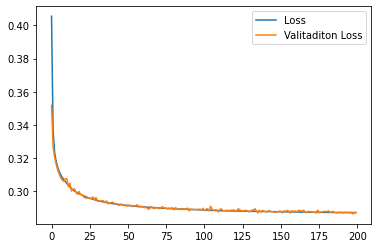

In [33]:
plt.plot(hist.history['loss'],label = 'Loss')
plt.plot(hist.history['val_loss'],label = 'Valitaditon Loss')
plt.legend()
plt.show()

History kaydetme

In [32]:
with open('autoencoders_hist.json','w') as f:
  json.dump(hist.history,f)

Sonuçları test etme

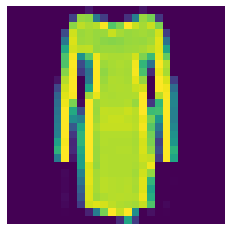

In [34]:
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(x_test)
plt.imshow(x_test[1500].reshape(28,28))
plt.axis('off')
plt.show()

In [35]:
decoded_img = autoencoder.predict(x_test)

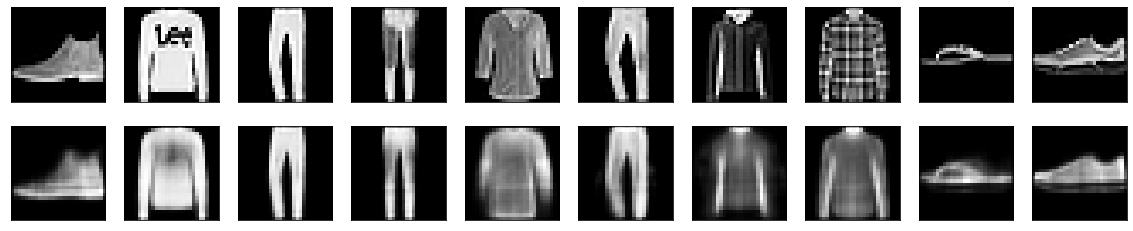

In [37]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()